In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import os
import sys
import scipy.linalg
import scipy.stats
import importlib
import pickle
sys.path.append("../../Python3/")
# from msHMM import HapsburgFiftyThree
from msHMM import HapsburgFiftyThree

In [2]:
# read in posterior
posterior = numpy.loadtxt ("/Users/steinrue/googleDrive/misc/data_matthias/posterior0.csv")
# load some files maybe
# recombination map (in morgan)
recoMap = numpy.loadtxt ("/Users/steinrue/googleDrive/misc/data_matthias/map.csv", delimiter=',')
print (recoMap.shape)
# readcounts for target individual
# first line: reads for ref; second line: reads for alt
target = numpy.loadtxt ("/Users/steinrue/googleDrive/misc/data_matthias/readcounts.csv", delimiter=',')
print (target.shape)
numSnps = target.shape[1]
# read in references
# 0 in refHaps is refAllele
refHaps = numpy.loadtxt ("/Users/steinrue/googleDrive/misc/data_matthias/refs.csv", delimiter=',')
print (refHaps.shape)

(38032,)
(2, 38032)
(792, 38032)


In [3]:
# set up a hapsburg
hapsburg = HapsburgFiftyThree (refHaps, recoMap)

# analyze a target
newPost = hapsburg.compute_long_ROH_posterior (target)

Memory Usage Full:
Memory Usage: 3798.667264 mB


Text(0.5,0,'Position in cM')

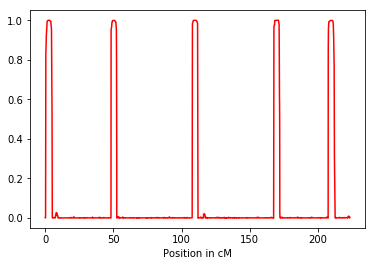

In [4]:
daRange = numpy.arange(0,38032)
xs = 100 * recoMap[daRange]
plt.plot (xs, newPost[daRange], 'red')
# plt.legend (["Posterior: Long ROH", "True ROH"])
# plt.ylim([-0.1,1.45])
plt.xlabel ("Position in cM")
# plt.savefig ("full_posterior.pdf")

In [5]:
# make it small for now, so we see what we are doing
numHaps = 8
numLoci = 3
myRefHaps = refHaps[0:numHaps,0:numLoci]
myTarget = target[:,0:numLoci]
myRecoMap = recoMap[0:numLoci]

In [6]:
pickle_rick = [myRefHaps, myTarget, myRecoMap]
pickle.dump (pickle_rick, open("tmp.pickle", "wb"))

In [7]:
pickle_rick = pickle.load (open("tmp.pickle", "rb"))
myRefHaps = pickle_rick[0]
myTarget = pickle_rick[1]
myRecoMap = pickle_rick[2]

In [8]:
def analyze_targets (targets, refHaps, recoMap):
    
    # see how many targets we have
    if (len(targets.shape) == 2):
        # only one target, prepare accordingly
        targets = targets[None,:,:]
    # if already multiple targets, all fine

    # prepare the analysis
    hapsburg = HapsburgFiftyThree (refHaps, recoMap)
    
    # and analyze all targets
    # now the target specific things
    all_ll = numpy.zeros ((targets.shape[0],targets.shape[2]))
    for i in range(targets.shape[0]):
        thisTarget = targets[i]
#         print (thisTarget)
        
        (newPost, fwd, bwd, tot_ll) = hapsburg.compute_full_log_posterior (thisTarget)

        # sum over hidden states
        all_ll[i,:] = numpy.sum(numpy.exp(fwd),axis=1)
        print (numpy.sum (numpy.exp(newPost), axis=1))
    
    # give it away now
    return all_ll

In [9]:
myRecoMap.shape

(3,)

In [10]:
results = analyze_targets (myTarget, myRefHaps, myRecoMap)

Memory Usage Full:
Memory Usage: 2351.3088 mB
[1. 1. 1.]


In [11]:
allTargets = -numpy.ones((12,2,3))

allTargets[0] = numpy.array([[0,0,0],
                             [1,1,2]])

allTargets[1] = numpy.array([[0,0,1],
                             [1,1,1]])

allTargets[2] = numpy.array([[0,0,2],
                             [1,1,0]])

allTargets[3] = numpy.array([[0,1,0],
                             [1,0,2]])

allTargets[4] = numpy.array([[0,1,1],
                             [1,0,1]])

allTargets[5] = numpy.array([[0,1,2],
                             [1,0,0]])

allTargets[6] = numpy.array([[1,0,0],
                             [0,1,2]])

allTargets[7] = numpy.array([[1,0,1],
                             [0,1,1]])

allTargets[8] = numpy.array([[1,0,2],
                             [0,1,0]])

allTargets[9] = numpy.array([[1,1,0],
                             [0,0,2]])

allTargets[10] = numpy.array([[1,1,1],
                              [0,0,1]])

allTargets[11] = numpy.array([[1,1,2],
                              [0,0,0]])


In [12]:
# results = analyze_targets (allTargets, myRefHaps, myRecoMap, pi_s = 0, pi_l = 0)
results = analyze_targets (allTargets, myRefHaps, myRecoMap)

Memory Usage Full:
Memory Usage: 2351.34976 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]
Memory Usage Full:
Memory Usage: 2351.353856 mB
[1. 1. 1.]


In [13]:
numpy.sum(results[:,0])/6

1.0

In [14]:
numpy.sum(results[:,1])/3

0.9999999999999994

In [15]:
numpy.sum(results[:,2])

0.9999999999999994